# Part II - (Ford GoBike System Data Explanatory Visualization)
## by (Naod Mergiya)

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
!pip install geopy
from geopy import distance
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

The data was downloaded from this source https://s3.amazonaws.com/baywheels-data/index.html where it is available in a single file compiled for the year 2019

In [7]:
df = pd.read_csv('201902-fordgobike-tripdata.csv') 
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [8]:
#create copy of dataset
df=df.copy()

#save df.copy as bike_df
bike_df=df.copy()

In [9]:
#convert dtype of 'start_time' to datetime object
bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
#split start_time into 'date' and 'ttime' columns
bike_df['start_ttime'] = bike_df['start_time'].dt.strftime('%H:%M')
bike_df['start_date'] = bike_df['start_time'].dt.strftime('%Y-%m-%d')

#extract 'hour' from start_time column
bike_df['start_hour'] = bike_df['start_time'].dt.strftime('%H')

#extract day from start_time column
bike_df['start_day']=bike_df['start_time'].dt.day_name()

#extract month from start_time column
bike_df['start_month']=bike_df['start_time'].dt.month_name()

#convert 'start_hour' to int dtype
bike_df['start_hour'] = bike_df['start_hour'].astype('int')

#convert dtype of start_date, start_ttime columns into datetime object
bike_df['start_ttime'] = pd.to_datetime(bike_df['start_ttime'])
bike_df['start_date'] = pd.to_datetime(bike_df['start_date'])

In [10]:
def dist_calc (row):
    start = (row['start_station_latitude' ], row['start_station_longitude'])
    stop = (row['end_station_latitude'], row['end_station_longitude'])
    return distance.great_circle(start, stop).km
bike_df['distance_km'] = bike_df.apply (lambda row: dist_calc (row), axis=1)

In [11]:
#drop irrelevant columns
bike_df = bike_df.drop(columns=['start_time', 'end_time', 'bike_share_for_all_trip', 
                                'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name'])
#rename 'start_ttime' column
bike_df.rename(columns = {'start_ttime':'start_time'}, inplace = True)

#remove latitude and longitude columns
bike_df = bike_df.drop(columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'])

## Hourly Bike Rides
Highest number of trips were taken around 5pm (17:00 to 17:59)
The least number of trips were taken between 3 and 4am

>when were most trips taken in terms of time of day?

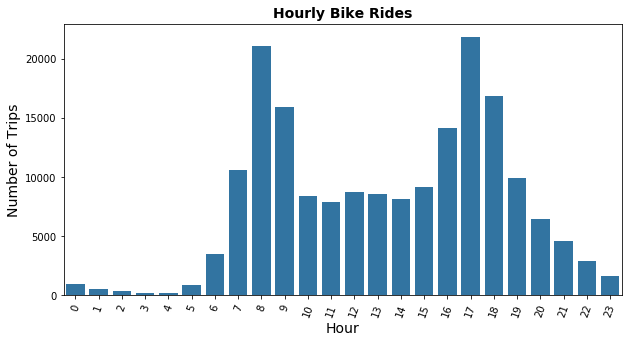

In [12]:

plt.figure(figsize=[10,5]);
base_color= sb.color_palette()[0]
sb.countplot(data= bike_df, x='start_hour', color= base_color);
plt.xticks(rotation= 70);
plt.xlabel('Hour',fontsize=14);
plt.ylabel('Number of Trips', fontsize=14);
plt.title('Hourly Bike Rides', fontsize=14, fontweight='bold');

## Daily Bike Rides
1. Most bike trips were taken on a Tuesday, followed closely by a Thursday
2. The least number of bike trips were taken on a Sunday

>when were most trips taken in terms of day of week?

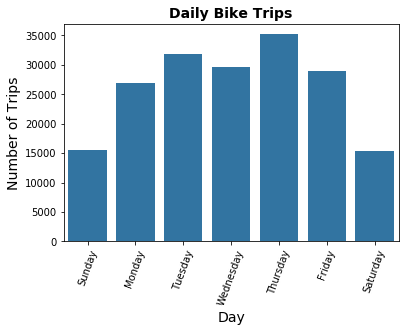

In [13]:

days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_of_week = pd.api.types.CategoricalDtype(ordered = True, categories = days)
bike_df['start_day']= bike_df['start_day'].astype(day_of_week)

sb.countplot(data=bike_df, x='start_day', color= base_color);
plt.xticks(rotation= 70);
plt.xlabel('Day', fontsize=14);
plt.ylabel('Number of Trips', fontsize=14);
plt.title('Daily Bike Trips', fontsize=14, fontweight='bold');

## Distribution of Bike Rides by User Type
10.8% of bike rides were taken by customers, while 89.2% were taken by subscribers

>What is the distribution of bike users by user type?

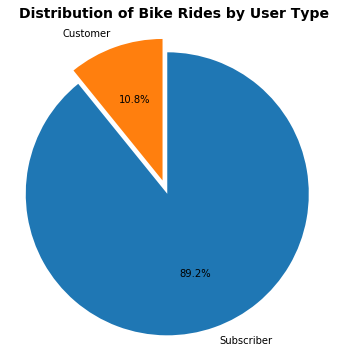

In [14]:

plt.figure(figsize=[6,6])
explode= (0.02, 0.08)
sorted_counts=bike_df['user_type'].value_counts()
plt.pie(sorted_counts, labels= sorted_counts.index, explode=explode, autopct='%1.1f%%', startangle=90, 
        shadow= False, counterclock= False);
plt.axis('square');
plt.title('Distribution of Bike Rides by User Type', fontsize=14, fontweight='bold');

## Daily Bike Usage per User Type
1. For subscribers, most bike trips were taken on a Tuesday, and the least number of bike trips were taken on a Sunday.
2. For customers, number of bike trips per day did not vary significantly, however, most bike trips were taken on a Friday.

>#what is the distribution of daily bike usage per user type?

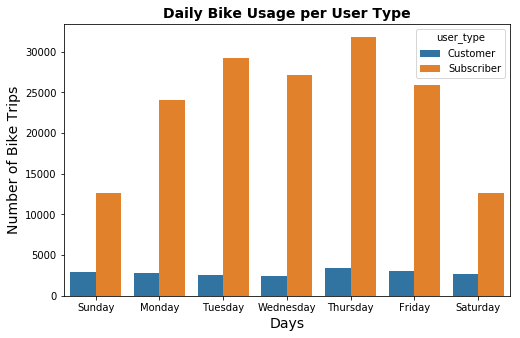

In [15]:

plt.figure(figsize=[8,5]);
sb.countplot(data = bike_df, x = 'start_day', hue = 'user_type');
plt.xlabel('Days', fontsize=14);
plt.ylabel('Number of Bike Trips', fontsize=14);
plt.title('Daily Bike Usage per User Type', fontsize=14, fontweight='bold');

## Average Trip Duration per Day and User Type

>day vs duration vs user_type

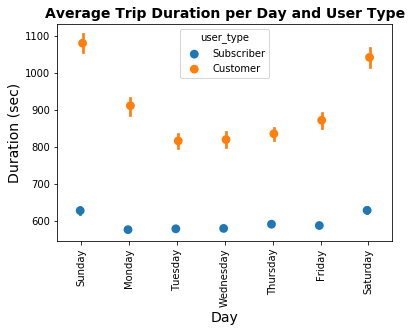

In [16]:
query_df= bike_df.query('duration_sec <= 3500')
sb.pointplot(data=query_df, x='start_day', y='duration_sec', hue='user_type', linestyles='', dodge= True);
plt.xticks(rotation= 90);
plt.xlabel('Day', fontsize=14);
plt.ylabel('Duration (sec)', fontsize=14);
plt.title('Average Trip Duration per Day and User Type', fontweight='bold', fontsize=14);

## Average Trip Duration per Hour and User Type

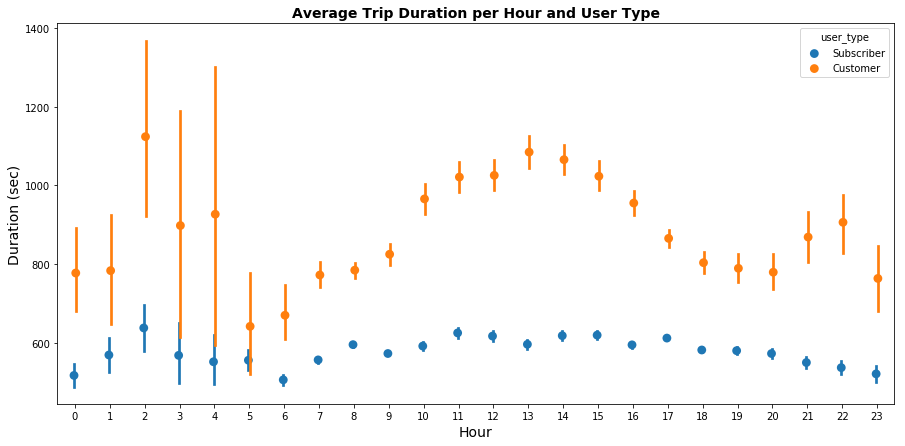

In [17]:

plt.figure(figsize=[15,7]);
sb.pointplot(data=query_df, x='start_hour', y='duration_sec', hue='user_type', linestyles='', dodge= True);
plt.xlabel('Hour', fontsize=14);
plt.ylabel('Duration (sec)', fontsize=14);
plt.title('Average Trip Duration per Hour and User Type', fontweight='bold', fontsize=14);

## Average Trip Distance per Month and User Type

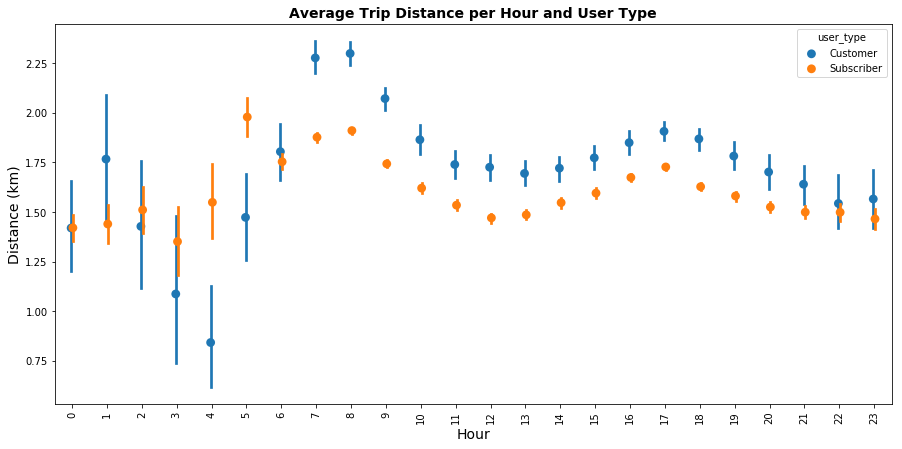

In [19]:
query2_df= bike_df.query('distance_km <= 9')
plt.figure(figsize=[15,7]);
sb.pointplot(data=query2_df, x='start_hour', y='distance_km', hue='user_type', linestyles='', dodge= True);
plt.xlabel('Hour', fontsize=14);
plt.xticks(rotation= 90);
plt.ylabel('Distance (km)', fontsize=14);
plt.title('Average Trip Distance per Hour and User Type', fontweight='bold', fontsize=14);

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 384392 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/